# Exploration of syntactic variations of Biblical Hebrew participles

*Chrisitan Højgaard Jensen*

This notebook is part of an ongoing research project with the ultimate goal to cluster Biblical Hebrew verbs according to *Aktionsart* (also called situation aspect). It is the contention of this research that the *Aktionsart* of verbs are sometimes explicated by the presence of certain syntactic elements. For instance, Accomplishment verbs may be distinguished from Stative verbs by the appearance of a temporal or locational phrase, referring to a temporal or geographical endpoint of the event described by the verb. Accordingly, it may be possible to identify the *Aktionsart* of specific verbs by clustering the verbs according to significant syntactic entities.

This notebook is about participles in the Hebrew Bible. Participles are generally regarded as implying the aspect of duration in contrast to punctuality. This aspect is important to sort out in order to classify Biblical Hebrew verbs according to *Aktionsart*.

In this notebook, I will test two hypothesis that occur frequently in grammars of Biblical Hebrew:
1. Presumed active verbs occur more often as predicative participles than stative verbs
2. Stative verbs occur more often as adjectival participles than predicative participles

In [1]:
PATH ='datasets/'

import collections
import pandas as pd
import matplotlib.pyplot as plt
from tf.app import use

In [2]:
A = use('bhsa', hoist=globals())

	connecting to online GitHub repo annotation/app-bhsa ... connected
Using TF-app in C:\Users\Ejer/text-fabric-data/annotation/app-bhsa/code:
	rv1.2=#5fdf1778d51d938bfe80b37b415e36618e50190c (latest release)
	connecting to online GitHub repo etcbc/bhsa ... connected
Using data in C:\Users\Ejer/text-fabric-data/etcbc/bhsa/tf/c:
	rv1.6=#bac4a9f5a2bbdede96ba6caea45e762fe88f88c5 (latest release)
	connecting to online GitHub repo etcbc/phono ... connected
Using data in C:\Users\Ejer/text-fabric-data/etcbc/phono/tf/c:
	r1.2=#1ac68e976ee4a7f23eb6bb4c6f401a033d0ec169 (latest release)
	connecting to online GitHub repo etcbc/parallels ... connected
Using data in C:\Users\Ejer/text-fabric-data/etcbc/parallels/tf/c:
	r1.2=#395dfe2cb69c261862fab9f0289e594a52121d5c (latest release)
   |     0.01s No structure info in otext, the structure part of the T-API cannot be used


In [3]:
query = '''
clause kind=VC
  phrase function=Pred|PreO|PreS|PtcO|PreC|Subj|Objc|Cmpl|Loca|Time
    word language=Hebrew vt=ptca|ptcp
'''

results = A.search(query)

  1.84s 7645 results


In [40]:
result_dict = {}

for r in results:
    heb = F.lex_utf8.v(r[2])
    gloss = F.gloss.v(L.u(r[2], 'lex')[0])
    label = f'{heb}#{gloss}'
    stem = F.vs.v(r[2])
    tense = F.vt.v(r[2])
    func = F.function.v(r[1])
    pdp = F.pdp.v(r[2])
    verb = r[2]
    
    result_dict[r[2]] = [heb, gloss, label, stem, tense, func, pdp]

In [41]:
data = pd.DataFrame(result_dict).T
data.columns = ['heb','gloss','label','stem','tense','func','pdp']
data.head()

,heb,gloss,label,stem,tense,func,pdp
27,רחף,shake,רחף#shake,piel,ptca,PreC,verb
90,בדל,separate,בדל#separate,hif,ptca,PreC,verb
187,זרע,sow,זרע#sow,hif,ptca,PreC,verb
191,עשׂה,make,עשׂה#make,qal,ptca,PreC,verb
210,זרע,sow,זרע#sow,hif,ptca,PreC,verb


In [6]:
len(data)

7645

### Overview of the data

In [38]:
pd.crosstab(index=data.pdp, columns=data.func)

func,Cmpl,Loca,Objc,PreC,PreO,PtcO,Subj,Time
pdp,,,,,,,,
adjv,57,8,131,65,0,0,62,3
subs,552,11,550,74,3,0,797,4
verb,0,0,0,5165,0,163,0,0


### Examples

In [14]:
query = '''
clause kind=VC
  phrase function=Pred|PreO|PreS|PtcO|PreC|Subj|Objc|Cmpl|Loca|Time
    word language=Hebrew vt=ptca|ptcp pdp={}
'''

def show(pdp, start=1, end=10):
    A.show(A.search(query.format(pdp)), start=start, end=end)
    
show('subs', 50, 70)

  2.69s 1991 results


### All participles occuring +25 times in relation to pdp

In [43]:
verb_count = collections.Counter(list(data.label))

verbs = []
for v in verb_count:
    if verb_count[v] >= 20:
        verbs.append(v)
        
len(verbs)

80

Only active particles in *Qal* are included:

In [45]:
data1 = data[(data.label.isin(verbs)) & (data.stem == 'qal') & (data.tense == 'ptca')]
len(data1)

3364

A proportional table is made of lexeme and pdp:

In [46]:
crosstab = pd.crosstab(data1.label, data1.pdp)
crosstab['sum'] = crosstab.sum(axis=1)

prop_table = crosstab.loc[:,:'verb'].div(crosstab["sum"], axis=0)

#The proportional is sorted according to verb and adjective
prop_table = prop_table.sort_values(by=['verb', 'adjv'], ascending=False)
prop_table.head()

pdp,adjv,subs,verb
label,,,
אמר#say,0.0,0.0,1.0
ירא#fear,0.0,0.0,1.0
כסה#cover,0.0,0.0,1.0
כתב#write,0.0,0.0,1.0
מלא#be full,0.0,0.0,1.0


In [47]:
prop_table.index

Index(['אמר#say', 'ירא#fear', 'כסה#cover', 'כתב#write', 'מלא#be full',
       'נגע#touch', 'נטה#extend', 'פנה#turn', 'פקד#miss', 'נתן#give',
       'עמד#stand', 'עלה#ascend', 'בוא#come', 'הלך#walk', 'קרא#call',
       'יצא#go out', 'בטח#trust', 'דבר#speak', 'שׁכב#lie down', 'ירד#descend',
       'שׁוב#return', 'שׁלח#send', 'שׁמע#hear', 'גור#dwell', 'ראה#see',
       'נפל#fall', 'עשׂה#make', 'עבר#pass', 'ידע#know', 'זבח#slaughter',
       'אכל#eat', 'מצא#find', 'משׁל#rule', 'חשׁב#account', 'בנה#build',
       'ילד#bear', 'ישׁב#sit', 'קום#arise', 'נשׂא#lift', 'אהב#love',
       'רכב#ride', 'עבד#work, serve', 'שׁמר#keep', 'יצר#shape', 'שׂנא#hate',
       'מות#die', 'רדף#pursue', 'אמן#be firm', 'ארר#curse', 'לחם#fight',
       'רוץ#run', 'רעה#pasture', 'צפה#look out', 'זנה#fornicate',
       'שׁמם#be desolate', 'שׁדד#despoil', 'שׁיר#sing', 'גאל#redeem',
       'שׁפט#judge', 'רום#be high', 'זוב#flow', 'איב#be hostile',
       'בין#understand', 'חתן#be father-in-law', 'רצח#kill'],
      dtyp

In [48]:
def reverse_hb(string):
    return string[::-1]

labels = [f'{reverse_hb(v[:v.index("#")])} {v[v.index("#")+1:]}' for v  in prop_table.index]

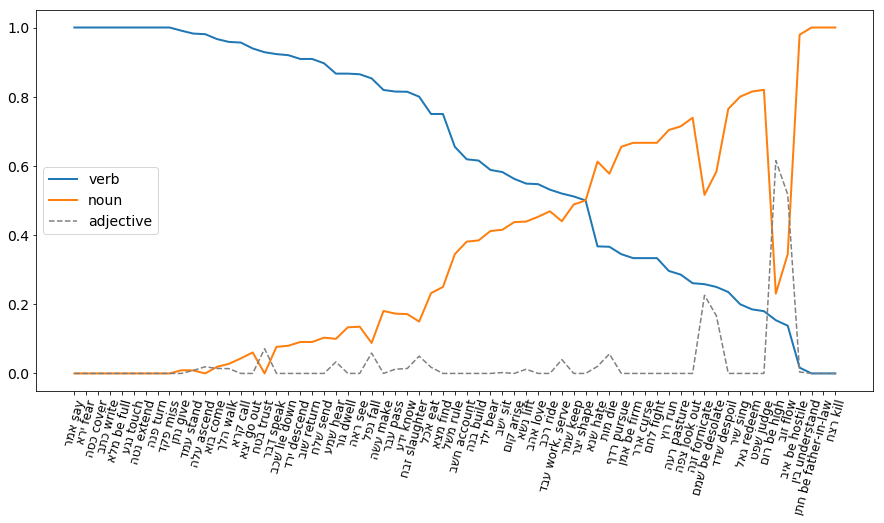

In [49]:
plt.figure(figsize=(15,7))

plt.plot(prop_table.verb, linewidth=2)
plt.plot(prop_table.subs, linewidth=2)
plt.plot(prop_table.adjv, linestyle='dashed', color='grey')

plt.xticks(ticks=prop_table.index, labels=labels, rotation=75, size=12, ha='right', rotation_mode="anchor")
plt.yticks(size=14)
plt.legend(['verb','noun','adjective'], fontsize=14)

plt.show()